In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from google.colab import drive #to import google drive data

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = '/NEU Dataset/NEU-DET/train/images'

In [5]:
!pip install -q keras

In [6]:
import keras

In [7]:
import torch

#Check if your system supports CUDA
gpu_available = torch.cuda.is_available() # is_available returns a bool as true or false

if gpu_available:
    print('Training on GPU')
else:
    print('Training on CPU')

Training on GPU


In [11]:
train_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/train/images'
valid_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/validation/images'
test_directory='/content/drive/MyDrive/NEU Dataset/NEU-DET/test/images'

In [12]:
print("Path Directory:",os.listdir("/content/drive/MyDrive/NEU Dataset/NEU-DET"))

Path Directory: ['train', 'validation', 'test']


In [14]:
print("Training Directory: ",os.listdir("/content/drive/MyDrive/NEU Dataset/NEU-DET/train/images"))
print("Testing Directory: ",os.listdir("/content/drive/MyDrive/NEU Dataset/NEU-DET/test/images"))
print("Validation Directory: ",os.listdir("/content/drive/MyDrive/NEU Dataset/NEU-DET/validation/images"))

Training Directory:  ['pitted_surface', 'rolled-in_scale', 'patches', 'scratches', 'inclusion', 'crazing']
Testing Directory:  ['inclusion', 'scratches', 'patches', 'crazing', 'rolled-in_scale', 'pitted_surface']
Validation Directory:  ['patches', 'inclusion', 'scratches', 'pitted_surface', 'crazing', 'rolled-in_scale']


In [15]:
#For Scratches
print("Training Scratches data:",len(os.listdir(train_directory+'/'+'scratches')))
print("Testing Scratches data:",len(os.listdir(test_directory+'/'+'scratches')))
print("Validation Scratches data:",len(os.listdir(valid_directory+'/'+'scratches')))

#For Pitted
print("Training Pitted data:",len(os.listdir(train_directory+'/'+'pitted_surface')))
print("Testing Pitted data:",len(os.listdir(test_directory+'/'+'pitted_surface')))
print("Validation Pitted data:",len(os.listdir(valid_directory+'/'+'pitted_surface')))

#For Rolled
print("Training Rolled data:",len(os.listdir(train_directory+'/'+'rolled-in_scale')))
print("Testing Rolled data:",len(os.listdir(test_directory+'/'+'rolled-in_scale')))
print("Validation Rolled data:",len(os.listdir(valid_directory+'/'+'rolled-in_scale')))

#For Patches
print("Training Patches data:",len(os.listdir(train_directory+'/'+'patches')))
print("Testing Patches data:",len(os.listdir(test_directory+'/'+'patches')))
print("Validation Patches data:",len(os.listdir(valid_directory+'/'+'patches')))

#For Inclusion
print("Training Inclusion data:",len(os.listdir(train_directory+'/'+'inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_directory+'/'+'inclusion')))
print("Validation Inclusion data:",len(os.listdir(valid_directory+'/'+'inclusion')))

#For Crazing
print("Training Crazing data:",len(os.listdir(train_directory+'/'+'crazing')))
print("Testing Crazing data:",len(os.listdir(test_directory+'/'+'crazing')))
print("Validation Crazing data:",len(os.listdir(valid_directory+'/'+'crazing')))

Training Scratches data: 236
Testing Scratches data: 32
Validation Scratches data: 32
Training Pitted data: 236
Testing Pitted data: 32
Validation Pitted data: 32
Training Rolled data: 236
Testing Rolled data: 32
Validation Rolled data: 32
Training Patches data: 236
Testing Patches data: 32
Validation Patches data: 32
Training Inclusion data: 236
Testing Inclusion data: 32
Validation Inclusion data: 32
Training Crazing data: 236
Testing Crazing data: 32
Validation Crazing data: 32


In [16]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(     # here we use the ImageDataGenerator
      rescale=1./255,
      rotation_range=180,
      width_shift_range=0.2,                # Applying these all Data Augmentations
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')



train_generator = train_datagen.flow_from_directory(batch_size=16,     # Batch size means at a time it takes 100
                                                     directory=train_directory,    # Here we put shuffle = True so that model doesn't memorise order
                                                     shuffle=True,
                                                     target_size=(200,200),
                                                     class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        valid_directory,
        target_size=(200, 200),
        batch_size=16,
        class_mode='categorical')

Found 1416 images belonging to 6 classes.
Found 192 images belonging to 6 classes.


In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization



input_shape = (200, 200, 3)
num_classes = 6

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=input_shape))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
#model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
#model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
#model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 100, 100, 64)      36928     
                                                        

In [20]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
)

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [179]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32, #power to 2 (2^n)
        epochs=55,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

Epoch 1/55
89/89 [==============================] - 24s 271ms/step - loss: 0.3323 - accuracy: 0.8884 - val_loss: 0.5765 - val_accuracy: 0.7708
Epoch 2/55
89/89 [==============================] - 24s 275ms/step - loss: 0.3732 - accuracy: 0.8630 - val_loss: 0.6668 - val_accuracy: 0.7500
Epoch 3/55
89/89 [==============================] - 25s 275ms/step - loss: 0.3289 - accuracy: 0.8898 - val_loss: 0.4562 - val_accuracy: 0.8021
Epoch 4/55
89/89 [==============================] - 24s 274ms/step - loss: 0.3183 - accuracy: 0.8835 - val_loss: 0.3596 - val_accuracy: 0.8490
Epoch 5/55
89/89 [==============================] - 24s 274ms/step - loss: 0.3132 - accuracy: 0.8821 - val_loss: 0.4705 - val_accuracy: 0.7917
Epoch 6/55
89/89 [==============================] - 24s 274ms/step - loss: 0.3134 - accuracy: 0.8863 - val_loss: 0.4815 - val_accuracy: 0.7865
Epoch 7/55
89/89 [==============================] - 24s 272ms/step - loss: 0.2986 - accuracy: 0.8990 - val_loss: 0.4264 - val_accuracy: 0.8229

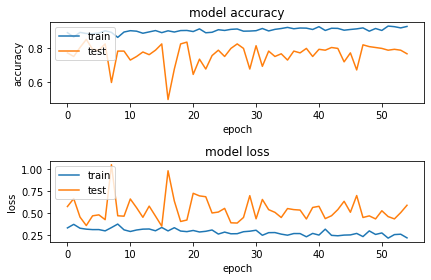

In [180]:
import matplotlib.pyplot as plt 
fig=plt.figure(1)  
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
fig.tight_layout()

 # summarize history for loss  

plt.subplot(212)  


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')
fig.tight_layout()
plt.show()

In [181]:
from sklearn.datasets import load_files
import numpy as np
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_directory)

In [182]:
# We just have the file names in the x set. Let's load the images and convert them into array.
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (192, 200, 200, 3)


In [183]:
x_test.shape

(192, 200, 200, 3)

In [184]:
print(y_test)

[3 2 5 3 3 2 0 4 4 0 0 4 4 5 5 5 1 2 4 3 1 5 4 5 5 4 1 1 5 1 0 1 3 1 1 0 5
 5 3 0 3 2 2 3 5 3 0 0 3 1 5 3 0 4 2 1 4 0 1 2 4 1 5 0 4 4 4 2 3 0 0 2 3 1
 5 3 1 0 1 3 3 1 0 2 2 5 5 3 5 4 4 5 1 0 2 4 2 2 4 1 2 1 1 2 0 4 0 5 4 0 0
 2 3 1 3 2 0 3 5 3 0 2 2 2 4 3 0 5 5 4 2 5 0 3 3 1 1 2 0 3 4 1 3 4 5 0 1 4
 1 4 4 1 0 3 4 0 4 3 5 1 4 5 4 0 3 2 2 3 4 5 2 2 0 5 2 5 5 5 1 1 4 2 2 2 1
 0 0 3 2 3 1 5]


In [185]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [186]:
from keras.utils import np_utils
y_test_one_encoded = np_utils.to_categorical(y_test,no_of_classes)

In [187]:
x_test

array([[[[195., 195., 195.],
         [209., 209., 209.],
         [216., 216., 216.],
         ...,
         [160., 160., 160.],
         [152., 152., 152.],
         [156., 156., 156.]],

        [[189., 189., 189.],
         [211., 211., 211.],
         [217., 217., 217.],
         ...,
         [172., 172., 172.],
         [159., 159., 159.],
         [166., 166., 166.]],

        [[183., 183., 183.],
         [209., 209., 209.],
         [220., 220., 220.],
         ...,
         [171., 171., 171.],
         [169., 169., 169.],
         [171., 171., 171.]],

        ...,

        [[238., 238., 238.],
         [230., 230., 230.],
         [235., 235., 235.],
         ...,
         [233., 233., 233.],
         [220., 220., 220.],
         [214., 214., 214.]],

        [[235., 235., 235.],
         [222., 222., 222.],
         [232., 232., 232.],
         ...,
         [233., 233., 233.],
         [217., 217., 217.],
         [209., 209., 209.]],

        [[235., 235., 235.],
       

In [188]:
x_test = x_test.astype('float32')/255

In [189]:
x_test

array([[[[0.7647059 , 0.7647059 , 0.7647059 ],
         [0.81960785, 0.81960785, 0.81960785],
         [0.84705883, 0.84705883, 0.84705883],
         ...,
         [0.627451  , 0.627451  , 0.627451  ],
         [0.59607846, 0.59607846, 0.59607846],
         [0.6117647 , 0.6117647 , 0.6117647 ]],

        [[0.7411765 , 0.7411765 , 0.7411765 ],
         [0.827451  , 0.827451  , 0.827451  ],
         [0.8509804 , 0.8509804 , 0.8509804 ],
         ...,
         [0.6745098 , 0.6745098 , 0.6745098 ],
         [0.62352943, 0.62352943, 0.62352943],
         [0.6509804 , 0.6509804 , 0.6509804 ]],

        [[0.7176471 , 0.7176471 , 0.7176471 ],
         [0.81960785, 0.81960785, 0.81960785],
         [0.8627451 , 0.8627451 , 0.8627451 ],
         ...,
         [0.67058825, 0.67058825, 0.67058825],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.67058825, 0.67058825, 0.67058825]],

        ...,

        [[0.93333334, 0.93333334, 0.93333334],
         [0.9019608 , 0.9019608 , 0.9019608 ]

In [190]:
y_pred = model.predict(x_test)

In [191]:
print(y_pred)

[[2.21634294e-10 7.93901086e-02 1.74374436e-05 2.12783873e-01
  7.06838863e-03 7.00740218e-01]
 [9.86394733e-02 7.38106659e-11 6.24633953e-02 6.89500663e-03
  8.32002044e-01 6.25198098e-08]
 [4.61113925e-11 2.14720012e-21 1.64040532e-08 3.52033611e-11
  9.61748803e-17 1.00000000e+00]
 ...
 [1.28594344e-08 2.89812088e-01 2.95852631e-04 5.96331418e-01
  4.32986533e-03 1.09230764e-01]
 [1.01316264e-05 4.14952815e-01 1.15941861e-03 2.51861930e-01
  4.86968737e-03 3.27146024e-01]
 [2.80007839e-07 7.83553430e-12 4.54392357e-05 2.60852585e-06
  8.79625428e-10 9.99951720e-01]]


In [192]:
y_predd = np.argmax(np.round(y_pred),axis=1)

In [193]:
print(y_predd)

[5 4 5 3 1 2 4 4 4 0 0 4 4 5 5 5 1 0 4 0 1 5 4 1 5 4 1 5 5 1 4 1 4 1 1 0 5
 5 3 0 3 0 2 4 5 3 0 0 1 1 5 4 4 4 4 1 4 4 1 2 4 1 5 0 4 4 0 2 0 0 0 2 1 5
 5 4 1 4 1 1 0 1 0 0 2 5 5 0 5 4 4 5 1 4 2 4 0 2 4 1 4 1 1 2 4 4 0 5 4 4 4
 2 3 1 3 2 0 0 5 0 0 2 2 0 4 1 0 5 5 4 0 5 4 0 1 1 1 0 0 3 4 1 3 4 5 4 1 4
 1 4 4 1 0 0 4 0 4 3 5 0 4 5 4 0 1 2 0 3 4 5 2 4 0 5 2 5 5 5 1 1 4 0 2 3 1
 4 0 3 2 3 0 5]


In [194]:
test_eval = model.evaluate(x_test,y_test_one_encoded, verbose=0)

In [195]:
x_test

array([[[[0.7647059 , 0.7647059 , 0.7647059 ],
         [0.81960785, 0.81960785, 0.81960785],
         [0.84705883, 0.84705883, 0.84705883],
         ...,
         [0.627451  , 0.627451  , 0.627451  ],
         [0.59607846, 0.59607846, 0.59607846],
         [0.6117647 , 0.6117647 , 0.6117647 ]],

        [[0.7411765 , 0.7411765 , 0.7411765 ],
         [0.827451  , 0.827451  , 0.827451  ],
         [0.8509804 , 0.8509804 , 0.8509804 ],
         ...,
         [0.6745098 , 0.6745098 , 0.6745098 ],
         [0.62352943, 0.62352943, 0.62352943],
         [0.6509804 , 0.6509804 , 0.6509804 ]],

        [[0.7176471 , 0.7176471 , 0.7176471 ],
         [0.81960785, 0.81960785, 0.81960785],
         [0.8627451 , 0.8627451 , 0.8627451 ],
         ...,
         [0.67058825, 0.67058825, 0.67058825],
         [0.6627451 , 0.6627451 , 0.6627451 ],
         [0.67058825, 0.67058825, 0.67058825]],

        ...,

        [[0.93333334, 0.93333334, 0.93333334],
         [0.9019608 , 0.9019608 , 0.9019608 ]

In [196]:
y_test

array([3, 2, 5, 3, 3, 2, 0, 4, 4, 0, 0, 4, 4, 5, 5, 5, 1, 2, 4, 3, 1, 5,
       4, 5, 5, 4, 1, 1, 5, 1, 0, 1, 3, 1, 1, 0, 5, 5, 3, 0, 3, 2, 2, 3,
       5, 3, 0, 0, 3, 1, 5, 3, 0, 4, 2, 1, 4, 0, 1, 2, 4, 1, 5, 0, 4, 4,
       4, 2, 3, 0, 0, 2, 3, 1, 5, 3, 1, 0, 1, 3, 3, 1, 0, 2, 2, 5, 5, 3,
       5, 4, 4, 5, 1, 0, 2, 4, 2, 2, 4, 1, 2, 1, 1, 2, 0, 4, 0, 5, 4, 0,
       0, 2, 3, 1, 3, 2, 0, 3, 5, 3, 0, 2, 2, 2, 4, 3, 0, 5, 5, 4, 2, 5,
       0, 3, 3, 1, 1, 2, 0, 3, 4, 1, 3, 4, 5, 0, 1, 4, 1, 4, 4, 1, 0, 3,
       4, 0, 4, 3, 5, 1, 4, 5, 4, 0, 3, 2, 2, 3, 4, 5, 2, 2, 0, 5, 2, 5,
       5, 5, 1, 1, 4, 2, 2, 2, 1, 0, 0, 3, 2, 3, 1, 5])

In [197]:
y_test_one_encoded

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
# loss_v, accuracy_v = model.evaluate(valid_directory, verbose=1)
# print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
# print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

In [198]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.5953236818313599
Test accuracy: 0.7708333134651184


In [199]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_test, y_predd, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.50      0.62      0.56        32
     Class 1       0.78      0.88      0.82        32
     Class 2       1.00      0.56      0.72        32
     Class 3       0.92      0.38      0.53        32
     Class 4       0.61      0.97      0.75        32
     Class 5       0.91      0.97      0.94        32

    accuracy                           0.73       192
   macro avg       0.79      0.73      0.72       192
weighted avg       0.79      0.73      0.72       192



In [ ]:
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# #Plotting the confusion matrix
# confusion_mtx = confusion_matrix(y_test, y_predd)

# #Defining the class labels
# class_names=['inclusion', 'scratches', 'patches', 'crazing', 'rolled-in-scale', 'pitted_surface']

# # Plotting non-normalized confusion matrix

# plot_confusion_matrix(y_test, y_predd, display_labels = class_names, labels='Confusion matrix, without normalization')

In [ ]:
# model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
# plot_confusion_matrix(model,X =test_generator.classes, y_true = y_pred, labels = category_names, normalize=False)

In [139]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

matrix = confusion_matrix(y_test, y_predd)
matrix.diagonal()/matrix.sum(axis=1)

array([0.875  , 0.90625, 0.6875 , 0.59375, 1.     , 0.8125 ])

In [140]:
print(matrix)

[[28  0  3  0  1  0]
 [ 1 29  0  1  0  1]
 [ 4  0 22  5  1  0]
 [ 5  6  0 19  2  0]
 [ 0  0  0  0 32  0]
 [ 2  1  3  0  0 26]]


In [166]:
class_names = ['class a', 'class b', 'class c', 'class d']

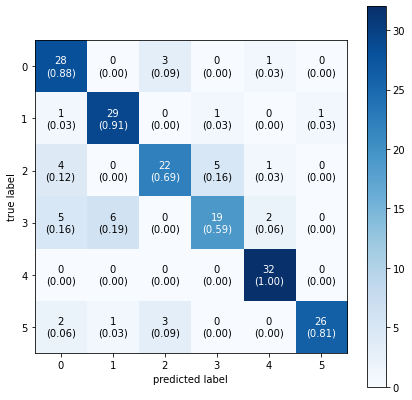

In [177]:
from mlxtend.plotting import plot_confusion_matrix

class_names=['inclusion', 'scratches', 'patches', 'crazing', 'rolled-in-scale', 'pitted_surface']

fig, ax = plot_confusion_matrix(conf_mat=matrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                # ,
                                # class_names=class_names
                                figsize=(7, 7)
                                )
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_predd, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
# cmd.plot()

# cm = confusion_matrix(y_true, y_preds, normalize='all')
# cmd = ConfusionMatrixDisplay(cm, display_labels=['business','health'])
# cmd.plot()

In [ ]:
# from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# y_true=y_test
# res = tf.math.confusion_matrix(y_true,y_predd)
# plot_confusion_matrix(classifier, x_test, y_test,
#                              display_labels=class_names,
#                              cmap=plt.cm.Blues,
#                              normalize=normalize)

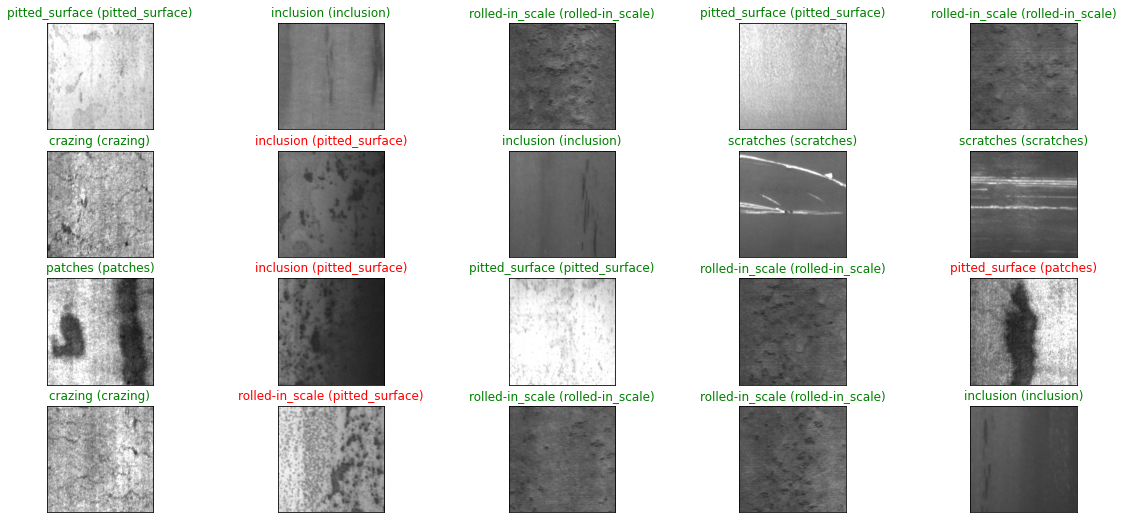

In [178]:
# Let's visualize test prediction.

y_pred = model.predict(x_test)

# plot a raandom sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test_one_encoded[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))